# Tutorial: Fundamentos e Implementación del Perceptrón
---
## Fundamentos de la técnica
El Perceptrón es el modelo más simple de una red neuronal, concebido por Frank Rosenblatt en 1957. Es un algoritmo de aprendizaje supervisado utilizado para la clasificación binaria. Esto significa que su objetivo es clasificar un conjunto de entradas en una de dos categorías (por ejemplo, 0 o 1, -1 o 1, Verdadero o Falso).

Funciona como un clasificador lineal; es decir, traza una línea (o un hiperplano en dimensiones superiores) para separar las dos clases. La condición fundamental para que el Perceptrón funcione correctamente es que los datos deben ser linealmente separables.

El proceso de aprendizaje consiste en ajustar sus pesos internos de forma iterativa basándose en los errores de clasificación que comete durante el entrenamiento.

---
## Modelo Matemático de la técnica
El funcionamiento del Perceptrón se basa en dos cálculos principales:

**Función de Entrada (Suma Ponderada):** El modelo calcula una suma ponderada de las características de entrada ($x_{i}$)y sus pesos correspondientes ($w_{i}$), añadiendo un término de sesgo (b). El sesgo permite que la línea de decisión se desplace, sin necesidad de pasar por el origen.
$$z=\sum_{i=1}^n w_{i}x_{i} + b = w * x + b$$

**Función de Activación (Función Escalón):**
La salida de la suma ponderada (z) pasa a través de una función de activación, que en el Perceptrón clásico es una función escalón (step function). Esta función produce una salida binaria.
$$
\hat{y} = f(z) =
\begin{cases}
1 & \text{si } z > \theta \\
0 & \text{si no}
\end{cases}
$$
Donde θ es un umbral, que a menudo se simplifica a 0 al incorporar el sesgo en los pesos.

El aprendizaje ocurre ajustando los pesos con la siguiente regla de actualización cada vez que hay un error:

$$w_{i}(nuevo)= w_{i}(viejo)+η⋅(y-\hat{y})⋅x_{i}$$

+ η (eta) es la tasa de aprendizaje (learning rate), un valor pequeño que controla la magnitud del ajuste.
+ $(y-\hat{y})$ es el error (la diferencia entre el valor real y la predicción).

---
## Descripción de la librería, clases, funciones y su parámetros empleadas
Para implementar nuestro Perceptrón, utilizaremos las siguientes herramientas de Python:

+ **NumPy:** Es la librería fundamental para la computación científica en Python. La usaremos para manejar los vectores y matrices de manera eficiente (entradas, pesos, etc.).

+ **Matplotlib:** Es una librería para crear visualizaciones estáticas, animadas e interactivas. La emplearemos para generar los gráficos de dispersión y visualizar la línea de decisión del modelo.

+ **Sklearn:** Una de las librerías más importantes para el Machine Learning en Python.

+ **Sklearn.metrics:** Módulo que contiene funciones para evaluar el rendimiento del modelo, como accuracy_score.

+ **Sklearn.linear_model.Perceptron**: La implementación optimizada y robusta del algoritmo Perceptrón.
  + eta0: tasa de aprendizaje inicial
  + max_iter: número máximo de iteraciones (epochs)
  + tol: tolerancia para la parada temprana (None para desactivar)
  + fit_intercept: si incluir o no el intercepto (bias)

---
## Pipeline
A continuación se desarrollan las subsecciones del pipeline.


###  Preprocesamiento
En esta sección se preparan los datos, pero como en el código ya están definidos y listos para usarse, solo colocamos su definición aquí.

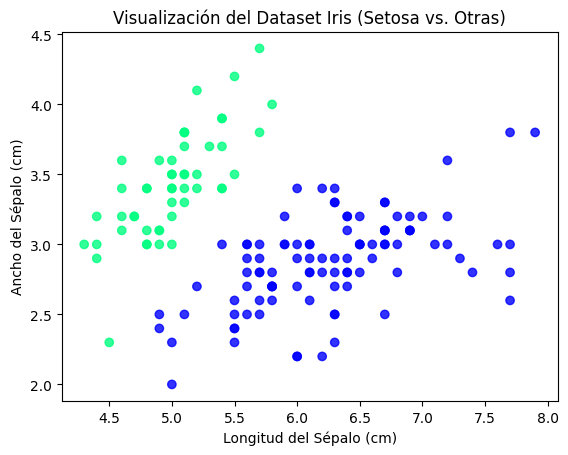

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. Cargar el dataset de lirios (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Para este ejemplo, convertiremos el problema a clasificación binaria:
# Etiqueta 1 si es Iris-Setosa (que es y==0), y 0 para las otras dos especies.
y_binary = np.where(y == 0, 1, 0)

# 2. Análisis Estadístico y Gráfico de Dispersión
# Usaremos las dos primeras características: longitud y ancho del sépalo.
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap='winter', alpha=0.8)
plt.xlabel("Longitud del Sépalo (cm)")
plt.ylabel("Ancho del Sépalo (cm)")
plt.title("Visualización del Dataset Iris (Setosa vs. Otras)")
plt.show()


# 3. Preparar los datos para el Perceptrón
# Añadimos una columna de unos a X para el término de sesgo (bias)
X_b = np.c_[np.ones((len(X), 1)), X]

# Combinar características y etiquetas para barajar
combined_data = np.hstack((X_b, y_binary.reshape(-1, 1)))

# 4. Mezclar y dividir los datos
np.random.seed(5) # Para reproducibilidad
np.random.shuffle(combined_data)

train_size = int(0.7 * len(combined_data))
train = combined_data[:train_size]
test = combined_data[train_size:]

# Separar características (X) de etiquetas (y)
x_train = train[:, :-1]
y_train = train[:, -1]

x_test = test[:, :-1]
y_test = test[:, -1]

### Feature Engineering

### Modelo Selection

### Model Training
Aquí se define la función del Perceptrón para el entrenamiento (perceptron_train) y se utiliza para ajustar el modelo a los datos de entrenamiento (x_train, y_train), obteniendo los pesos finales (w).

In [30]:
# Función para entrenar el modelo Perceptrón
def perceptron_train(x, y, eta, t):
    w = np.zeros(x.shape[1])
    J = [] # Historial del costo (Suma de Errores al Cuadrado)

    for _ in range(t):
        errors = 0
        for xi, target in zip(x, y):
            update = eta * (target - (np.dot(xi, w) >= 0))
            w += update * xi
            errors += int(update != 0.0)
        J.append(errors)
    return w, J

# Definición de hiperparámetros
eta = 0.01  # Tasa de aprendizaje
t = 50      # Número de iteraciones (épocas)

# Entrenar el modelo
w, J = perceptron_train(x_train, y_train, eta, t)

print("Pesos finales del modelo entrenado:")
print(w)

Pesos finales del modelo entrenado:
[ 0.01   0.022  0.037 -0.073 -0.035]


### Prediction
Se utiliza el modelo ya entrenado (w) para hacer predicciones sobre el conjunto de prueba.

In [31]:
# Función para realizar predicciones con el modelo entrenado
def perceptron_test(x, w, z):
    y_pred = []
    for i in range(0, len(x)):
        f = np.dot(x[i], w)

        # Función de activación para predecir la clase
        if f > z:
            yhat = 1
        else:
            yhat = 0
        y_pred.append(yhat)
    return y_pred

# Realizar predicciones sobre el conjunto de prueba
y_pred = perceptron_test(x_test, w, z)

### Model Evaluation


In [32]:
from sklearn.metrics import accuracy_score

# Imprimir la evolución del error (SSE) durante el entrenamiento
print("\nEvolución del error (SSE) por iteración:")
print(J)

# Calcular y mostrar la precisión del modelo en los datos de prueba
print("\nLa puntuación de precisión (accuracy) es:")
print(accuracy_score(y_test, y_pred))



Evolución del error (SSE) por iteración:
[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

La puntuación de precisión (accuracy) es:
1.0


## Perceptron con sklearn para reconocer las compuertas lógicas AND y OR

In [33]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.linear_model import Perceptron

# Datos de entrenamiento para la compuerta AND
# Entradas (X): [0,0], [0,1], [1,0], [1,1]
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Salidas (y): 0, 0, 0, 1
y_and = np.array([0, 0, 0, 1])

# Crear el modelo Perceptrón de sklearn
# tol: Criterio de parada. n_iter_no_change: # de iteraciones sin mejora para detenerse.
model_and = Perceptron(tol=1e-3, random_state=0)

# Entrenar el modelo
model_and.fit(X_and, y_and)

print("--- Compuerta AND ---")
print(f"Pesos aprendidos: {model_and.coef_}")
print(f"Sesgo (bias) aprendido: {model_and.intercept_}")

# Realizar predicciones
print("\nPredicciones para las entradas AND:")
print(f"Predicción para [0, 0]: {model_and.predict([[0, 0]])[0]}")
print(f"Predicción para [0, 1]: {model_and.predict([[0, 1]])[0]}")
print(f"Predicción para [1, 0]: {model_and.predict([[1, 0]])[0]}")
print(f"Predicción para [1, 1]: {model_and.predict([[1, 1]])[0]}")

--- Compuerta AND ---
Pesos aprendidos: [[2. 2.]]
Sesgo (bias) aprendido: [-2.]

Predicciones para las entradas AND:
Predicción para [0, 0]: 0
Predicción para [0, 1]: 0
Predicción para [1, 0]: 0
Predicción para [1, 1]: 1


In [35]:
# Datos de entrenamiento para la compuerta OR
# Entradas (X): [0,0], [0,1], [1,0], [1,1]
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Salidas (y): 0, 1, 1, 1
y_or = np.array([0, 1, 1, 1])

# Crear y entrenar el modelo Perceptrón
model_or = Perceptron(tol=1e-3, random_state=0)
model_or.fit(X_or, y_or)

print("\n--- Compuerta OR ---")
print(f"Pesos aprendidos: {model_or.coef_}")
print(f"Sesgo (bias) aprendido: {model_or.intercept_}")

# Realizar predicciones
print("\nPredicciones para las entradas OR:")
print(f"Predicción para [0, 0]: {model_or.predict([[0, 0]])[0]}")
print(f"Predicción para [0, 1]: {model_or.predict([[0, 1]])[0]}")
print(f"Predicción para [1, 0]: {model_or.predict([[1, 0]])[0]}")
print(f"Predicción para [1, 1]: {model_or.predict([[1, 1]])[0]}")


--- Compuerta OR ---
Pesos aprendidos: [[2. 2.]]
Sesgo (bias) aprendido: [-1.]

Predicciones para las entradas OR:
Predicción para [0, 0]: 0
Predicción para [0, 1]: 1
Predicción para [1, 0]: 1
Predicción para [1, 1]: 1
